(2, 68)
face3d.shape (3, 68)


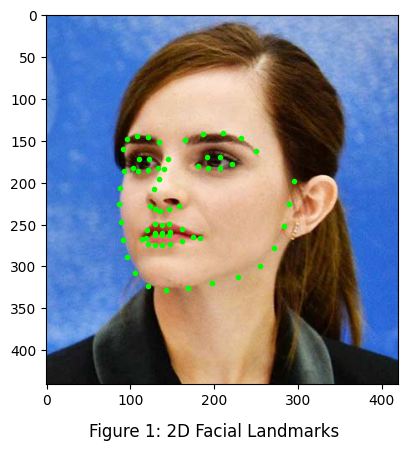

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan2, sqrt
%matplotlib inline

img_name = 'emma_watson'
face2d = np.load(img_name + '.npy')
face2d = face2d.astype('float32')
face3d = np.load('basel_68_pts.npy')
print(face2d.shape)
# Do not change the following two lines
face3d[1,:] *= -1
face3d[2,:] *= -1
print('face3d.shape', face3d.shape)

# TODO1: Display the 2D landmarks
# enter your code here 
img_bgr = cv2.imread('./emma_watson.jpg')
img = img_bgr[...,::-1] 
#print(img)
plt.imshow(img)
plt.plot(face2d[0],face2d[1],'.',c='lime')
plt.suptitle('Figure 1: 2D Facial Landmarks',y=0,verticalalignment='baseline')
plt.show()

In [35]:
# TODO 2: Pose estimation
# enter your code here
#print(img.shape[:2])
import math

def radian2Degree(radian):
    return (radian*180/math.pi)

height, width = img.shape[:2]
f = max(height,width)

cx = width/2
cy = height/2
K = np.array([[f, 0, cx],
              [0, f, cy],
              [0, 0, 1]])

_, rotvec, transvec = cv2.solvePnP(face3d.T,face2d.T, K, None)
rotation_mat = cv2.Rodrigues(rotvec)[0]

l = math.sqrt(rotation_mat[0][0]**2+rotation_mat[1][0]**2 )
if l >= 10**-6:
    pitch = math.atan2(rotation_mat[2][1],rotation_mat[2][2])
    yaw = math.atan2(-rotation_mat[2][0],l)
    roll = math.atan2(-rotation_mat[1][0],rotation_mat[0][0])
else:
    pitch = -math.atan2(rotation_mat[1][2],rotation_mat[1][1])
    yaw = math.atan2(-rotation_mat[2][0],l)
    roll = 0

pitch_degree = radian2Degree(pitch)
yaw_degree = radian2Degree(yaw)
roll_degree = radian2Degree(roll)
print("pitch = ",pitch_degree)
print("yaw = ",yaw_degree)
print("roll = ",roll)


pitch =  -2.613606478871854
yaw =  14.336056927183353
roll =  -0.06497258705564238


(2, 68)


Text(0.5, 0, 'Figure 2')

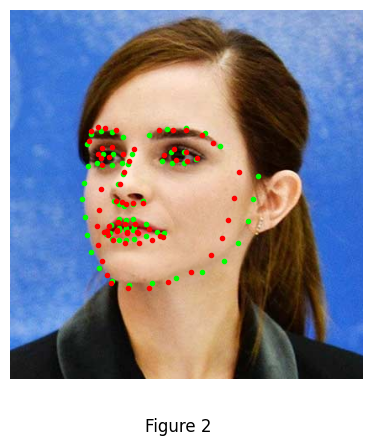

In [42]:
# TODO 3: Compute the reprojected 2D landmarks, face2d_repr
# enter your code here

def ThreeDimesion2TwoDimesion(K, extrinsic_mat, face3d):
    one = np.ones([1,len(face3d[0,:])])
    M_head = np.vstack((face3d, one))
    m_head = K@extrinsic_mat@M_head
    m = np.vstack((m_head[0:1,:]/m_head[2:3,:],m_head[1:2,:]/m_head[2:3,:]))
    return m

extrinsic_mat = np.hstack((rotation_mat,transvec))
face2d_repr = ThreeDimesion2TwoDimesion(K,extrinsic_mat,face3d)
print(face2d_repr.shape)

plt.imshow(img)
plt.plot(face2d[0],face2d[1],'.',c='lime')
plt.plot(face2d_repr[0],face2d_repr[1],'.',c='r')
plt.axis('off')
plt.suptitle('Figure 2',y=0,verticalalignment='baseline')


In [50]:
# TODO 4: Print the reprojection error
# enter your code here

def reprojectionError(face2d,face2d_repr):
    num = len(face2d[1,:])
    tmp = np.sqrt((face2d[0,:]-face2d_repr[0,:])**2+(face2d[1,:]-face2d_repr[1,:])**2)
    error = np.sum(tmp)/num
    return error

reprojection_error = reprojectionError(face2d,face2d_repr)
print('reprojection error = ',reprojection_error)

reprojection error =  8.262862360060065


(2, 51)
(3, 51)
the reprojection error of 51 point=  4.220630272314527


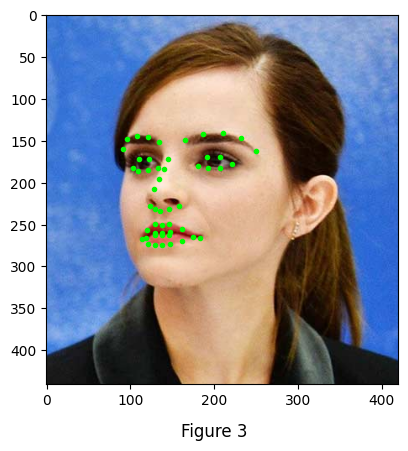

In [61]:
# TODO 5: Repeat TODO 2 ~ TODO 4 using 51 landmarks
# enter your code here

face2d_51 = face2d[:,17:]
face3d_51 = face3d[:,17:]

height, width = img.shape[:2]
f = max(height,width)

cx = width/2
cy = height/2
K = np.array([[f, 0, cx],
              [0, f, cy],
              [0, 0, 1]])

_, rotvec, transvec = cv2.solvePnP(face3d_51.T,face2d_51.T, K, None)
rotation_mat = cv2.Rodrigues(rotvec)[0]
extrinsic_mat = np.hstack((rotation_mat,transvec))
face2d_51_repr = ThreeDimesion2TwoDimesion(K,extrinsic_mat,face3d_51)

reprojection_error_51 = reprojectionError(face2d_51,face2d_51_repr)
print('the reprojection error of 51 point= ',reprojection_error_51)

plt.imshow(img)
plt.plot(face2d_51[0],face2d_51[1],'.',c='lime')
plt.suptitle('Figure 3',y=0,verticalalignment='baseline')
plt.show()

In [ ]:
# Question 1: Which is better to perform pose estimation, using 68 points or using 51 points? 
# enter your answer here
# 從[TODO 4]與[TODO 5]的結果來看，可以發現[TODO 5]的error較小，也因此效果比
# 效果比較好。我覺得會有這樣的結果是因為face2d與face2d_repr中的face contour
# 差異過大，導致在拿61個點來計算error時明顯比拿51個點的error還來得大。

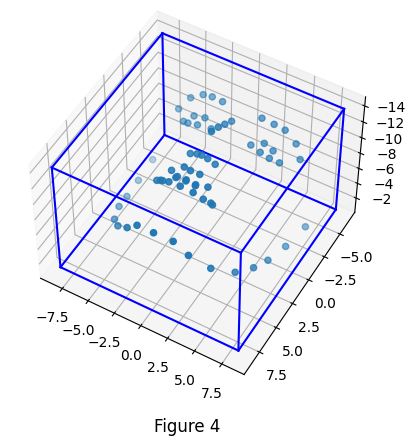

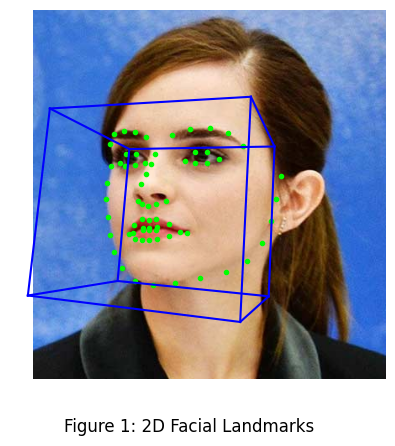

In [74]:
# TODO 6: Augmented reality
# enter your code here
def cube_point(x_max_min,y_max_min,z_max_min):
    max_min = [x_max_min,y_max_min,z_max_min]
    vertices = []
    for x in x_max_min:
        for y in y_max_min:
            for z in z_max_min:
                vertices.append([x, y, z])

    return vertices


x_max_min = [np.min(face3d[0,:])-1, np.max(face3d[0,:])+1]
y_max_min = [np.min(face3d[1,:])-1, np.max(face3d[1,:])+1]
z_max_min = [np.min(face3d[2,:])-1, np.max(face3d[2,:])+1]


cube_vertices =np.array(cube_point(x_max_min,y_max_min,z_max_min)) 
cube_vertices = cube_vertices.T

fig4 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(face3d[0,:], face3d[1,:], face3d[2,:])
ax.view_init(310, 60, 180)

connect_point = {0:[1,2,4],3:[1,2,7],5:[1,4,7],6:[2,4,7]}
for index, index_num in enumerate(connect_point):
    for i in connect_point[index_num]:
        ax.plot(cube_vertices[0,[index_num,i]],cube_vertices[1,[index_num,i]], cube_vertices[2,[index_num,i]],'b')
plt.suptitle('Figure 4',y=0,verticalalignment='baseline')


# Step 5.2

cube_vertices_2d = ThreeDimesion2TwoDimesion(K,extrinsic_mat, cube_vertices)

fig5 = plt.figure()

plt.imshow(img)
plt.plot(face2d[0],face2d[1],'.',c='lime')
for index, index_num in enumerate(connect_point):
    for i in connect_point[index_num]:
        plt.plot(cube_vertices_2d[0,[index_num,i]],cube_vertices_2d[1,[index_num,i]],'b')
plt.suptitle('Figure 5',y=0,verticalalignment='baseline')
plt.axis('off')
plt.show()